OBSERVATIONS

g:  3x120s\
r:  3x120s\
i:  3x180s\
Ha: 1x900s + 4x300s\
Hb: 4x1200s

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import glob
from astropy.io import fits
from matplotlib.colors import LogNorm

In [5]:
# Path to the FITS files
file_path = [f'data/bias_28_10_2024/Calib_{str(i).zfill(3)}bias_m20.fit' for i in range(9)]

# Open the BIAS file
bias = []

for f_p in file_path:    
    with fits.open(f_p) as hdul:
        #hdul.info()    # Display information about the FITS file contents
        bias.append(hdul[0].data)  # Access the primary data (assuming image is in the primary HDU)


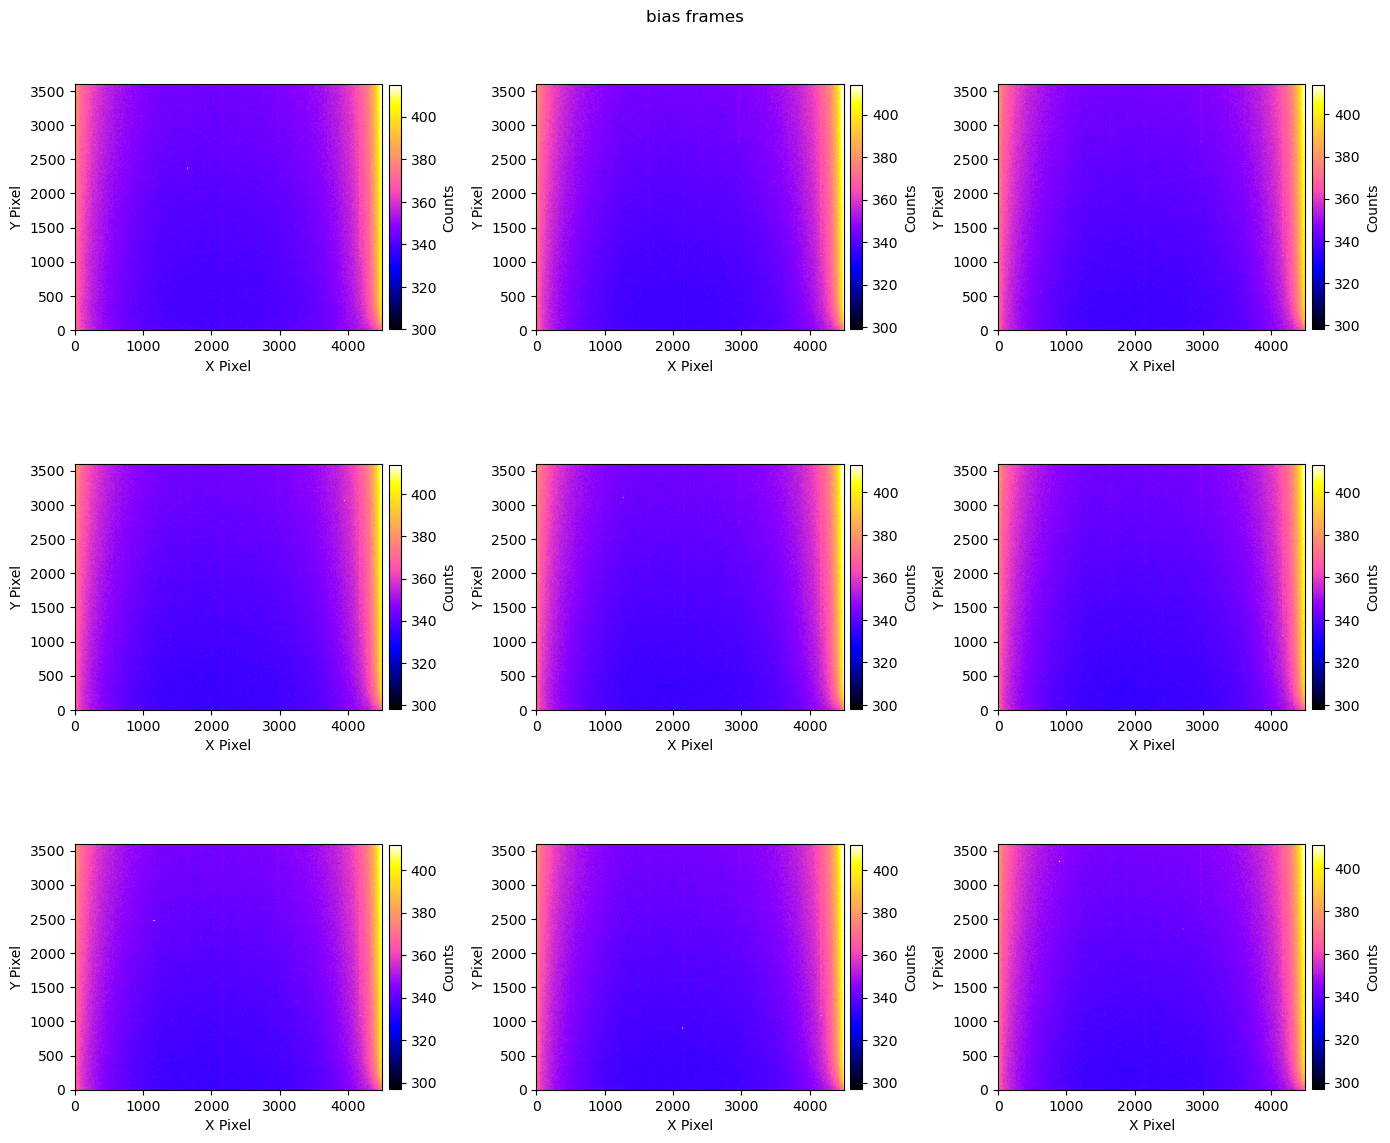

In [6]:
# Display RAW IMAGES 

fig, ax = plt.subplots(3,3,figsize=(14,12))
fig.suptitle("bias frames")

for i in range(9):
    h = i // 3  # Integer division of i by 3
    k = i % 3   # Remainder when i is divided by 3
    im = ax[h][k].imshow(bias[i], clim=np.quantile(bias[i], [0.01, 0.99]), cmap='gnuplot2', origin='lower')  # Use clim to scale the image based on the 1st and 99th quantiles
    plt.colorbar(im, ax = ax[h][k], location='right', fraction=0.0375, pad=0.02, label="Counts")     
    ax[h][k].set(xlabel="X Pixel",ylabel="Y Pixel")

#plt.subplots_adjust(bottom=0.15) 
plt.tight_layout()
plt.show()

In [7]:
## Get MASTER BIAS

# Stack the bias data into a 3D NumPy array
bias_stack = np.array(bias)

# Compute the master bias as the mean or as the median along the first axis (stacking axis)
master_bias_mean = np.mean(bias_stack, axis=0)
master_bias_median = np.median(bias_stack, axis=0)

# Save the master bias as a new FITS file
master_bias_filename = 'master_bias.fit'
hdu = fits.PrimaryHDU(master_bias_median)
hdu.writeto(master_bias_filename, overwrite=True)

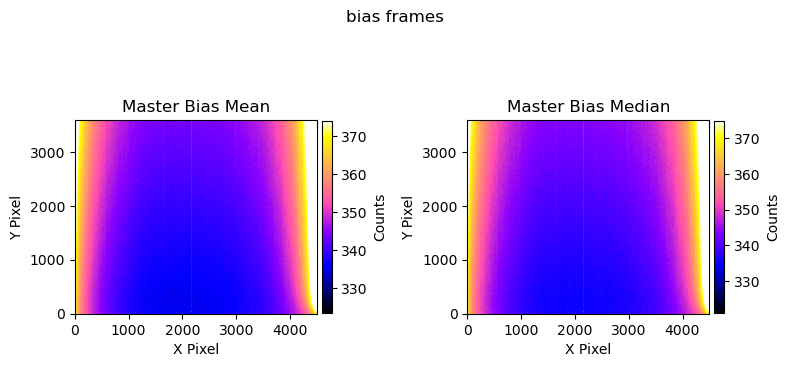

In [8]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
fig.suptitle("bias frames")

im1 = ax[0].imshow(master_bias_mean, clim=np.quantile(master_bias_mean[i], [0.01, 0.99]), cmap='gnuplot2', origin='lower')  # Use clim to scale the image based on the 1st and 99th quantiles
plt.colorbar(im1, ax = ax[0], location='right', fraction=0.0375, pad=0.02, label="Counts")     
ax[0].set(xlabel="X Pixel",ylabel="Y Pixel",title="Master Bias Mean")

im2 = ax[1].imshow(master_bias_median, clim=np.quantile(master_bias_median[i], [0.01, 0.99]), cmap='gnuplot2', origin='lower')  # Use clim to scale the image based on the 1st and 99th quantiles
plt.colorbar(im2, ax = ax[1], location='right', fraction=0.0375, pad=0.02, label="Counts")     
ax[1].set(xlabel="X Pixel",ylabel="Y Pixel",title="Master Bias Median")

#plt.subplots_adjust(bottom=0.15) 
plt.tight_layout()
plt.show()


In [9]:
#master_bias_mean_flattened = master_bias_mean.flatten()
#counts, bin_edges = np.histogram(master_bias_mean_flattened, bins='auto')

#ax[1][0].bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor="black", align="edge")
#ax[1][0].set(xlabel="Pixel Value (Counts)",ylabel="Number of Pixels (Frequency)",title="Histogram, mean")
#plt.grid(axis='y', linestyle='--', alpha=0.7)

#master_bias_median_flattened = master_bias_median.flatten()
#counts, bin_edges = np.histogram(master_bias_median_flattened, bins='auto')

#ax[1][1].bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor="black", align="edge")
#ax[1][1].set(xlabel="Pixel Value (Counts)",ylabel="Number of Pixels (Frequency)",title="Histogram, median")
